### Project Focus : Implimenting Clustering

                                Mall Customer Segmentation
##### Objective:  
divide the customers into five various groups.
Clustering based on 2 features (Annual Income in k$  and Spending Score) in order to visulaize or plot the clusters 


##### Dataset Description:
        You can find the dataset "Mall_Customers.csv" under the dataset section on Blackboard.

This Dataset has complete the information about Mall Customer Spending Score. 
* The Dataset contains five attributes and 200 instances. 
* The 1st attribute is Customer ID which has every Customer has Unique 
* The 2nd attribute is Gender which is of course male/female.
* The 3rd attribute is age which is between 19 to 70 of different customers 
* The 4th attribute is Annual Income in k$ which have different customer have a different Income some have very low some have middle and some have very high income 
* The last attribute Spending Score which he spends on Mall.


### Step to do:

1. Import the necessary packages from scikit-learn (KMeans, AgglomerativeClustering, and silhouette_score)

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from numpy import absolute

# Additional imports
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")


In [2]:
# Load the data with Pandas using read_csv()
# Loading the dataset using pandas
try:
    mc_df = pd.read_csv('Mall_Customers.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Data loaded successfully.


In [3]:
# Set the number of rows to display
display_count = 10

# Display the head of the DataFrame
print(f"\nTop {display_count} rows of the DataFrame:")
mc_df.head(display_count)



Top 10 rows of the DataFrame:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Display the bottom of the DataFrame
print(f"\nBottom {display_count} rows of the DataFrame:")
mc_df.tail(display_count)


Bottom 10 rows of the DataFrame:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Make sure we are all clear of NaNs

# Check if there are any remaining NaN values in all columns of the DataFrame
missing_counts = mc_df.isnull().sum()

# Check if all columns have no missing values
all_columns_have_no_missing_values = (missing_counts == 0).all()

if all_columns_have_no_missing_values:
    print("No NaN values are remaining in any of the columns.")
else:
    print("There are still some NaN values in the columns:")
    print(missing_counts)
    
# Display the total number of missing values in each column
print("Total missing values in each column:")
print(mc_df.isnull().sum())


No NaN values are remaining in any of the columns.
Total missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Perform statistical analysis on numerical columns
statistical_summary = mc_df.describe()

# Display the statistical summary
print(statistical_summary)


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


3. Assign the two features Annual Income (k$)" and "Spending Score (1-100)" to X.

In [7]:
# Assign the two features to X
X = mc_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Check if the operation was successful
if 'Annual Income (k$)' in X.columns and 'Spending Score (1-100)' in X.columns:
    print("Features successfully assigned to X.")
    print("Shape of X:", X.shape)
else:
    print("Error: Features were not assigned to X.")

# Display the first few rows of X
X.head()


Features successfully assigned to X.
Shape of X: (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


4. Visualize the the two featuerse ("Annual Income (k$)" And "Spending Score (1-100)) to understand the data structure.

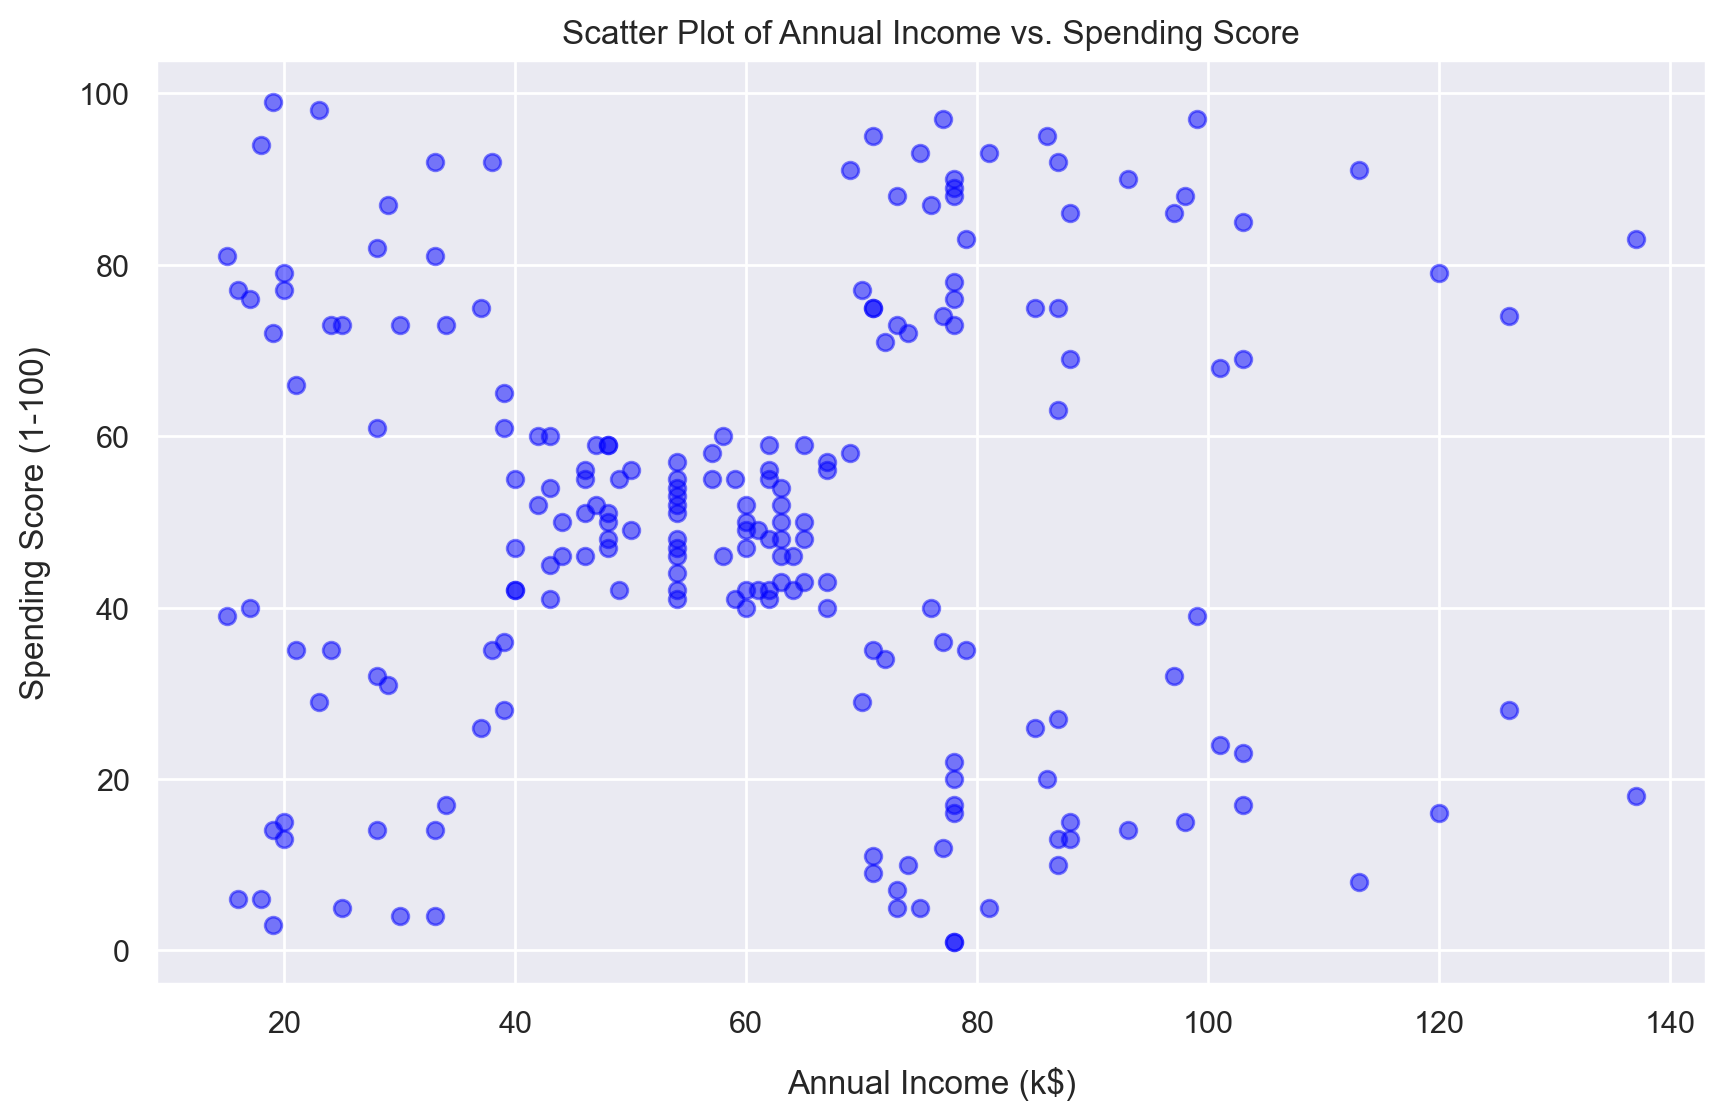

In [8]:
# Visualize the two features with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()



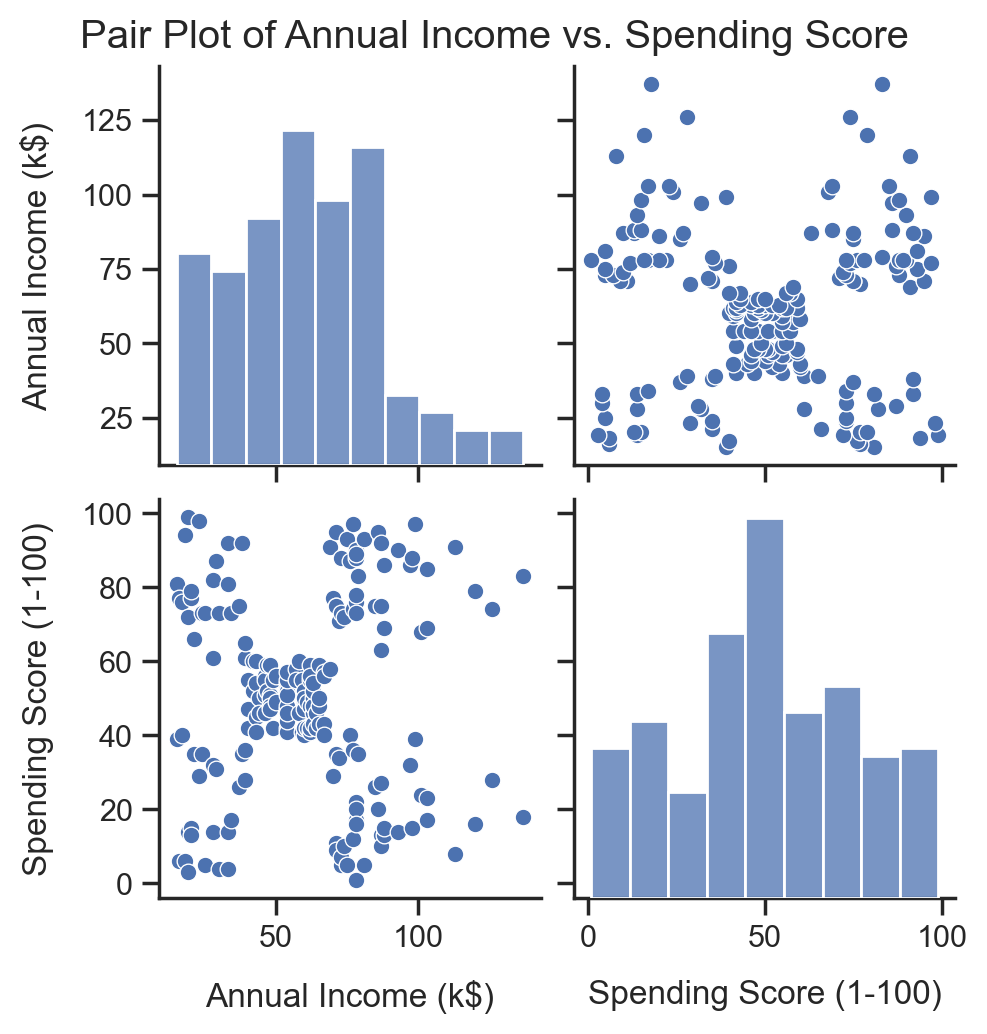

In [9]:
# Set the style for the plot
sns.set(style="ticks")

# Create a pair plot using seaborn
sns.pairplot(X)
plt.suptitle('Pair Plot of Annual Income vs. Spending Score', y=1.02)
plt.show()


In [10]:
# Set the number of clusters (K)
k = 5

# Suppress FutureWarning related to the default value of n_init
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Suppress UserWarning related to the memory leak on Windows with MKL
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Check if K is assigned a value
if k is not None:
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Check if KMeans instance was created and fit was successful
    if hasattr(kmeans, 'labels_'):
        # Add the cluster labels to the original DataFrame
        mc_df['Cluster'] = kmeans.labels_
        
        # Display the first few rows of the DataFrame with cluster labels
        print("KMeans clustering successful. Head of DataFrame:")
        print(mc_df.head())
    else:
        print("Error: KMeans fit was not successful.")
else:
    print("Error: K value is not assigned.")


KMeans clustering successful. Head of DataFrame:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


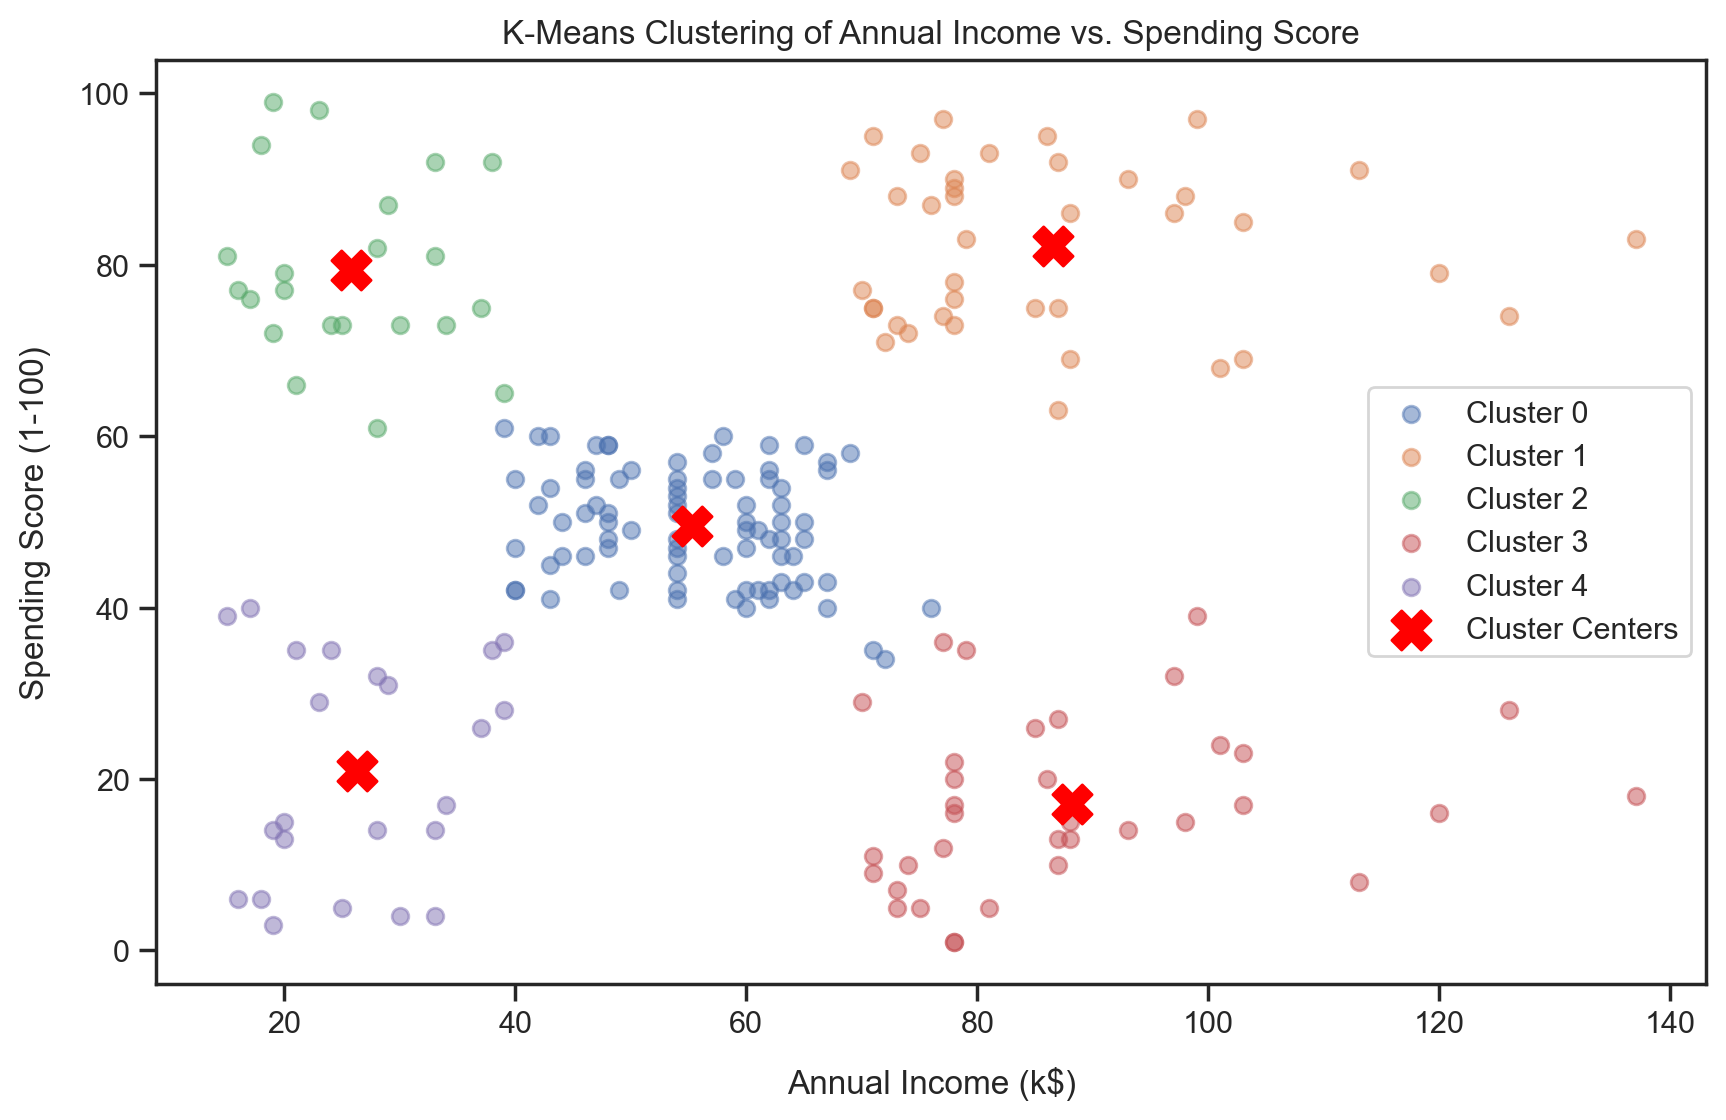

In [11]:
# Set the number of clusters (K)
k = 5

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the original DataFrame
mc_df['Cluster'] = kmeans.labels_

# Plot the predicted clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = mc_df[mc_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.5)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, color='red', label='Cluster Centers')

plt.title('K-Means Clustering of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [12]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

KMeans clustering successful. Head of DataFrame:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
KMeans Clustering Results:
--------------------------
Number of Clusters (K): 5
Silhouette Score: 0.5539
--------------------------


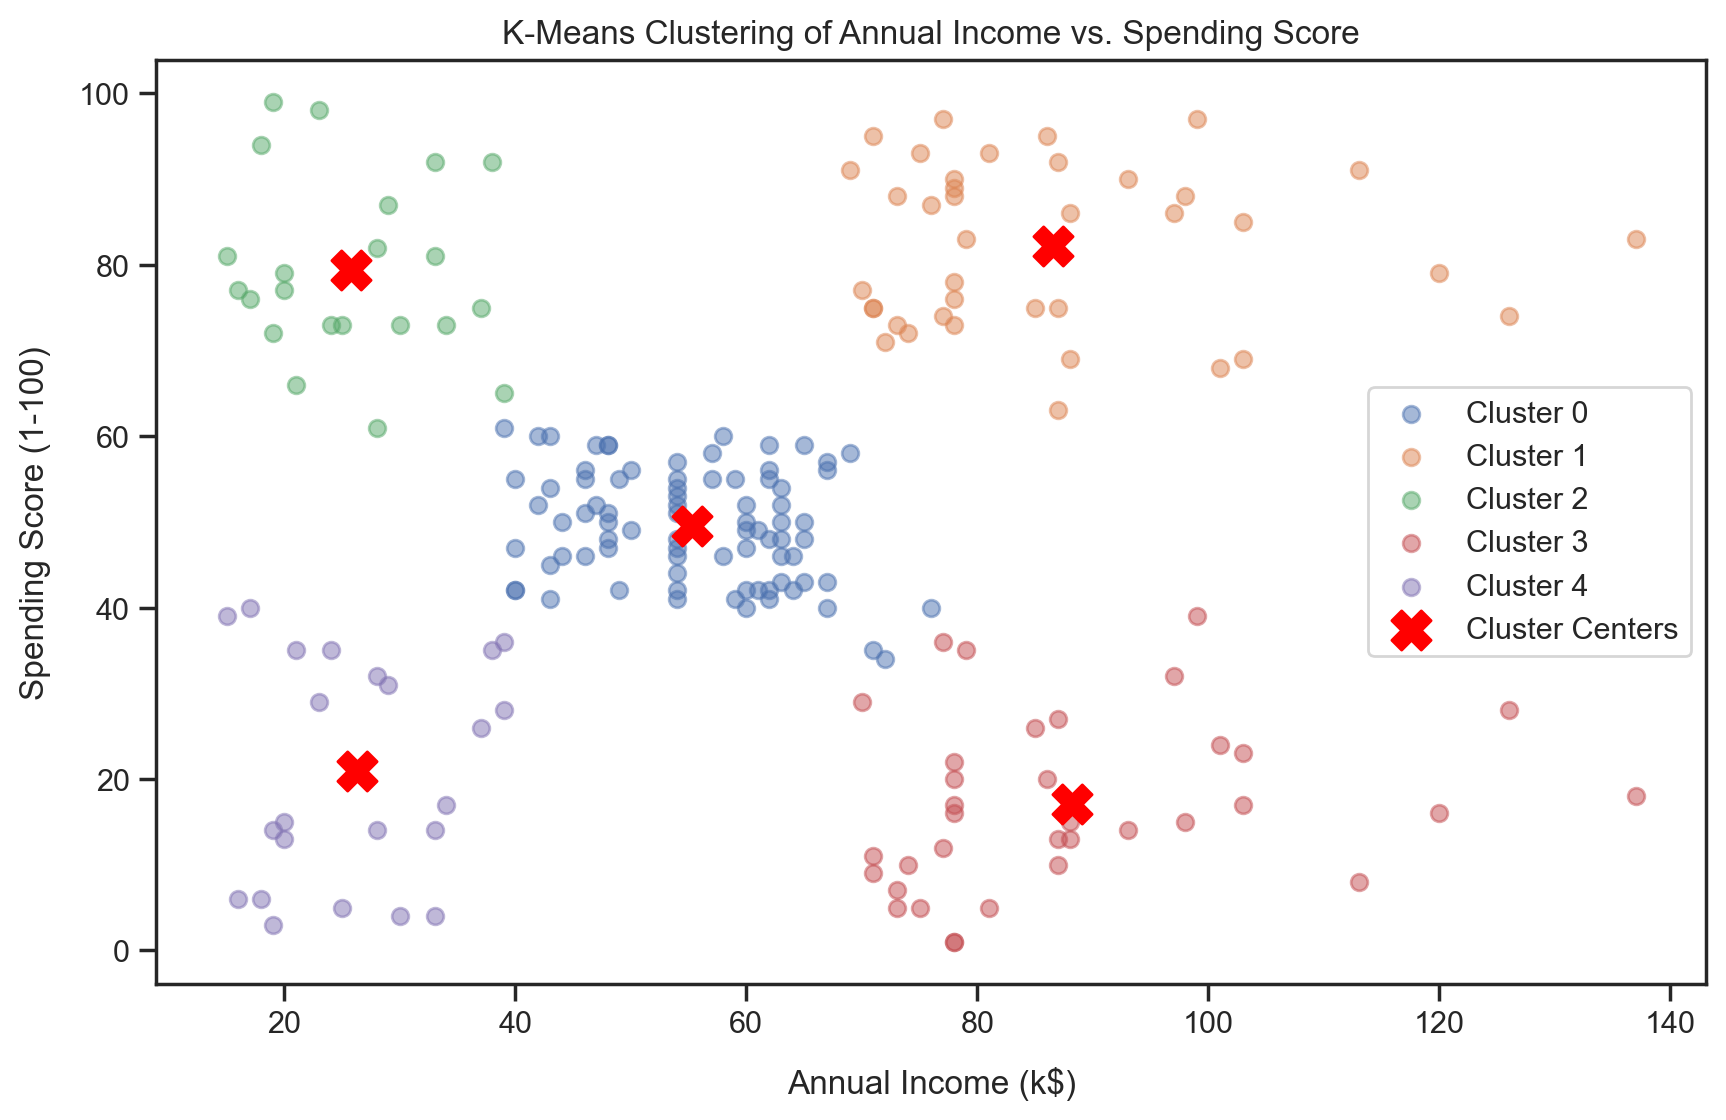

In [13]:
# Set the number of clusters (K)
k = 5

# Suppress FutureWarning related to the default value of n_init
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Suppress UserWarning related to the memory leak on Windows with MKL
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Check if K is assigned a value
if k is not None:
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Check if KMeans instance was created and fit was successful
    if hasattr(kmeans, 'labels_'):
        # Add the cluster labels to the original DataFrame
        mc_df['Cluster'] = kmeans.labels_
        
        # Display the first few rows of the DataFrame with cluster labels
        print("KMeans clustering successful. Head of DataFrame:")
        print(mc_df.head())
        
        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        
        # Display the Silhouette Score for K-means clustering
        print(f"KMeans Clustering Results:")
        print(f"--------------------------")
        print(f"Number of Clusters (K): {k}")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"--------------------------")

        
        # Plot the predicted clusters
        plt.figure(figsize=(10, 6))
        for cluster in range(k):
            cluster_data = mc_df[mc_df['Cluster'] == cluster]
            plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                        label=f'Cluster {cluster}', alpha=0.5)

        # Plot the cluster centers
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    marker='X', s=200, color='red', label='Cluster Centers')

        plt.title('K-Means Clustering of Annual Income vs. Spending Score')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.legend()
        plt.show()
        
    else:
        print("Error: KMeans fit was not successful.")
else:
    print("Error: K value is not assigned.")


#### a - single linkages:
* Implementation of Agglomerative Clustering with single linkages,  (1 point)
* Plot the predicted clusters. (1 point)
* compute the silhouette score  (1 point)

In [14]:
# Part 1: Implementation of Agglomerative Clustering with Single Linkages
# Set the number of clusters (K)
k = 5

# Suppress FutureWarning related to the default value of n_init
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Suppress UserWarning related to the memory leak on Windows with MKL
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Check if K is assigned a value
if k is not None:
    # Create an AgglomerativeClustering instance with single linkage
    agglomerative_single = AgglomerativeClustering(n_clusters=k, linkage='single')

    # Fit the model to the data
    agglomerative_single.fit(X)

    # Check if AgglomerativeClustering instance was created and fit was successful
    if hasattr(agglomerative_single, 'labels_'):
        # Add the cluster labels to the original DataFrame
        mc_df['Cluster_Single'] = agglomerative_single.labels_

        # Display the first few rows of the DataFrame with cluster labels
        print("\nAgglomerative Clustering with Single Linkage. Head of DataFrame:")
        print(mc_df[['Cluster_Single', 'Annual Income (k$)', 'Spending Score (1-100)']].head())
    else:
        print("Error: Agglomerative Clustering with Single Linkage fit was not successful.")
else:
    print("Error: K value is not assigned.")




Agglomerative Clustering with Single Linkage. Head of DataFrame:
   Cluster_Single  Annual Income (k$)  Spending Score (1-100)
0               1                  15                      39
1               1                  15                      81
2               1                  16                       6
3               1                  16                      77
4               1                  17                      40


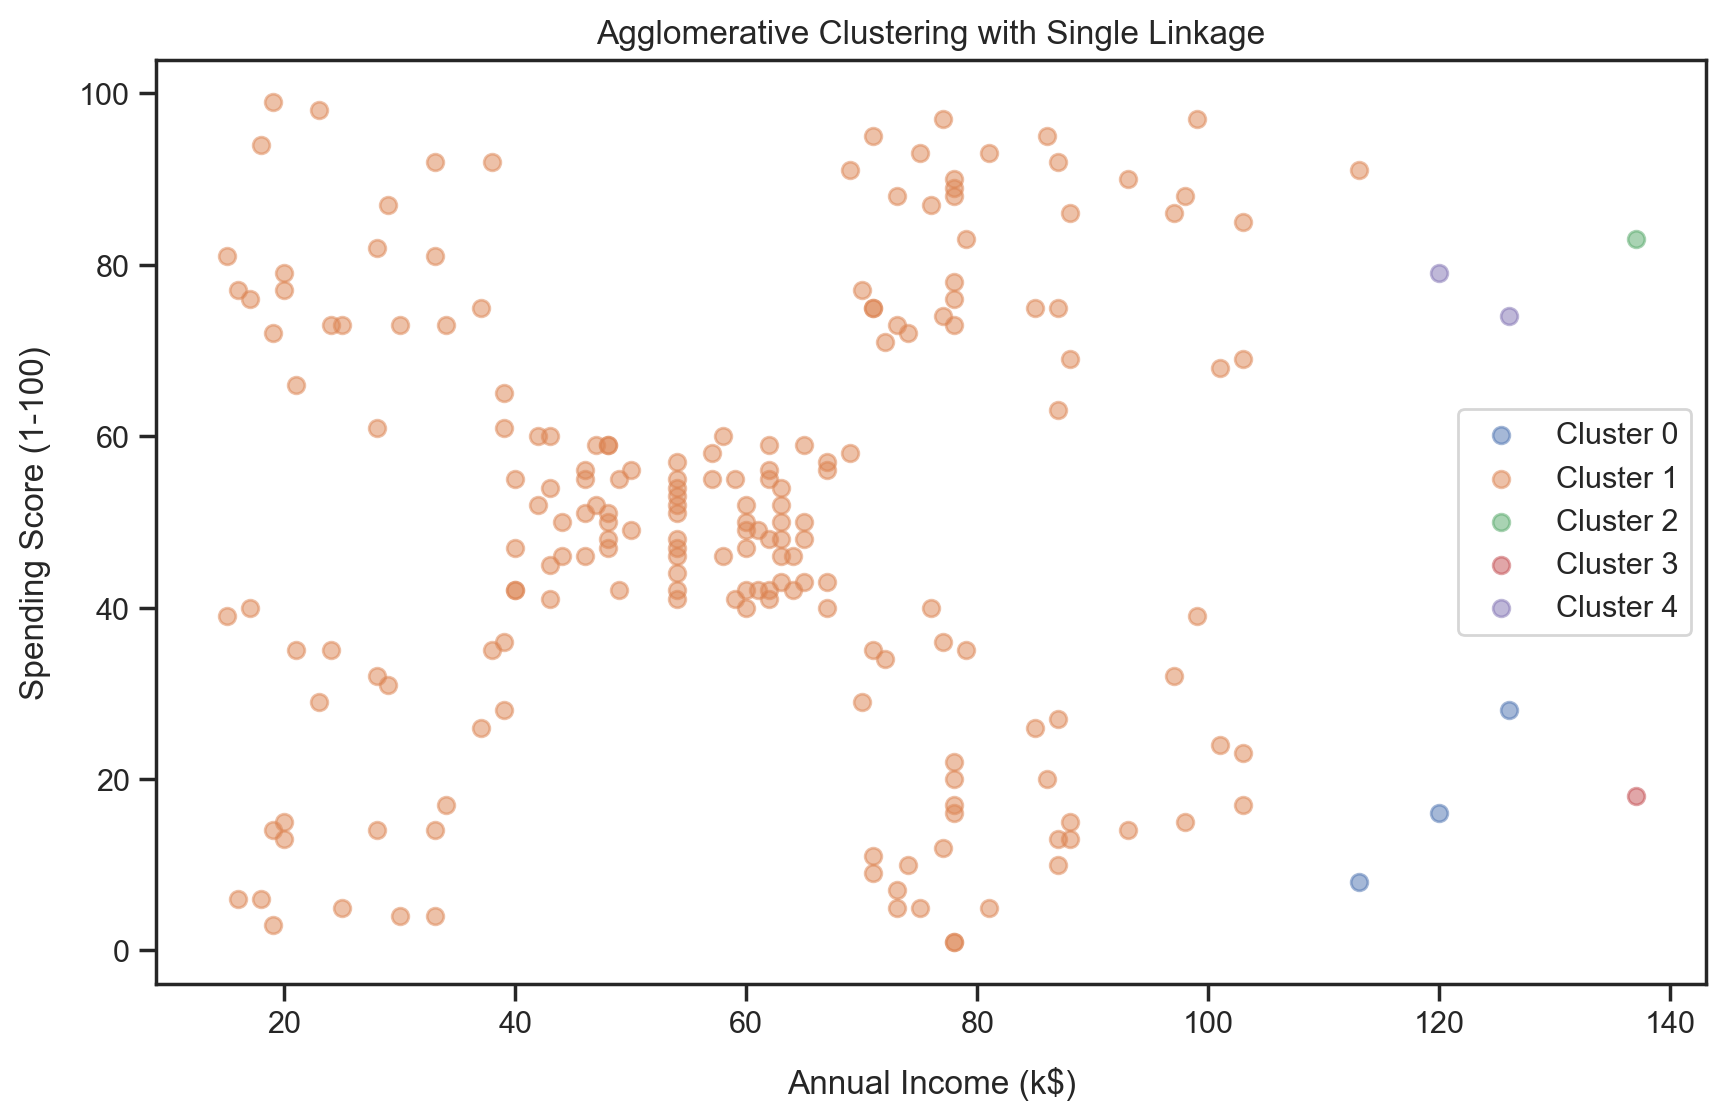

In [15]:
# Part 2: Plot the Predicted Clusters
# Plot the predicted clusters with single linkage
if hasattr(agglomerative_single, 'labels_'):
    plt.figure(figsize=(10, 6))
    for cluster in range(k):
        cluster_data = mc_df[mc_df['Cluster_Single'] == cluster]
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                    label=f'Cluster {cluster}', alpha=0.5)

    plt.title('Agglomerative Clustering with Single Linkage')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()
else:
    print("Error: Cannot plot clusters. Agglomerative Clustering with Single Linkage fit was not successful.")


In [16]:
# Part 3: Compute and Print the Silhouette Score
# Compute the silhouette score with single linkage
if hasattr(agglomerative_single, 'labels_'):
    silhouette_avg_single = silhouette_score(X, agglomerative_single.labels_)
    # Print the silhouette score
    print(f"\nSilhouette Score for Agglomerative Clustering with Single Linkage (K={k}): {silhouette_avg_single}")
else:
    print("Error: Cannot compute silhouette score. Agglomerative Clustering with Single Linkage fit was not successful.")



Silhouette Score for Agglomerative Clustering with Single Linkage (K=5): 0.2694896445402342


#### b - complete linkages:
* Implementation of Agglomerative Clustering with complete linkages,  (1 point)
* Plot the predicted clusters. (1 point)
* compute the silhouette score  (1 point)

In [17]:
# Implementation of Agglomerative Clustering with complete linkages
# Set the number of clusters (K)
k = 5

# Suppress FutureWarning related to the default value of n_init
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Suppress UserWarning related to the memory leak on Windows with MKL
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Check if K is assigned a value
if k is not None:
    # Create an AgglomerativeClustering instance with complete linkage
    agglomerative_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')

    # Fit the model to the data
    agglomerative_complete.fit(X)

    # Check if AgglomerativeClustering instance was created and fit was successful
    if hasattr(agglomerative_complete, 'labels_'):
        # Add the cluster labels to the original DataFrame
        mc_df['Cluster_Complete'] = agglomerative_complete.labels_

        # Display the first few rows of the DataFrame with cluster labels
        print("\nAgglomerative Clustering with Complete Linkage. Head of DataFrame:")
        print(mc_df[['Cluster_Complete', 'Annual Income (k$)', 'Spending Score (1-100)']].head())
    else:
        print("Error: Agglomerative Clustering with Complete Linkage fit was not successful.")
else:
    print("Error: K value is not assigned.")




Agglomerative Clustering with Complete Linkage. Head of DataFrame:
   Cluster_Complete  Annual Income (k$)  Spending Score (1-100)
0                 4                  15                      39
1                 3                  15                      81
2                 4                  16                       6
3                 3                  16                      77
4                 4                  17                      40


<Figure size 1000x600 with 0 Axes>

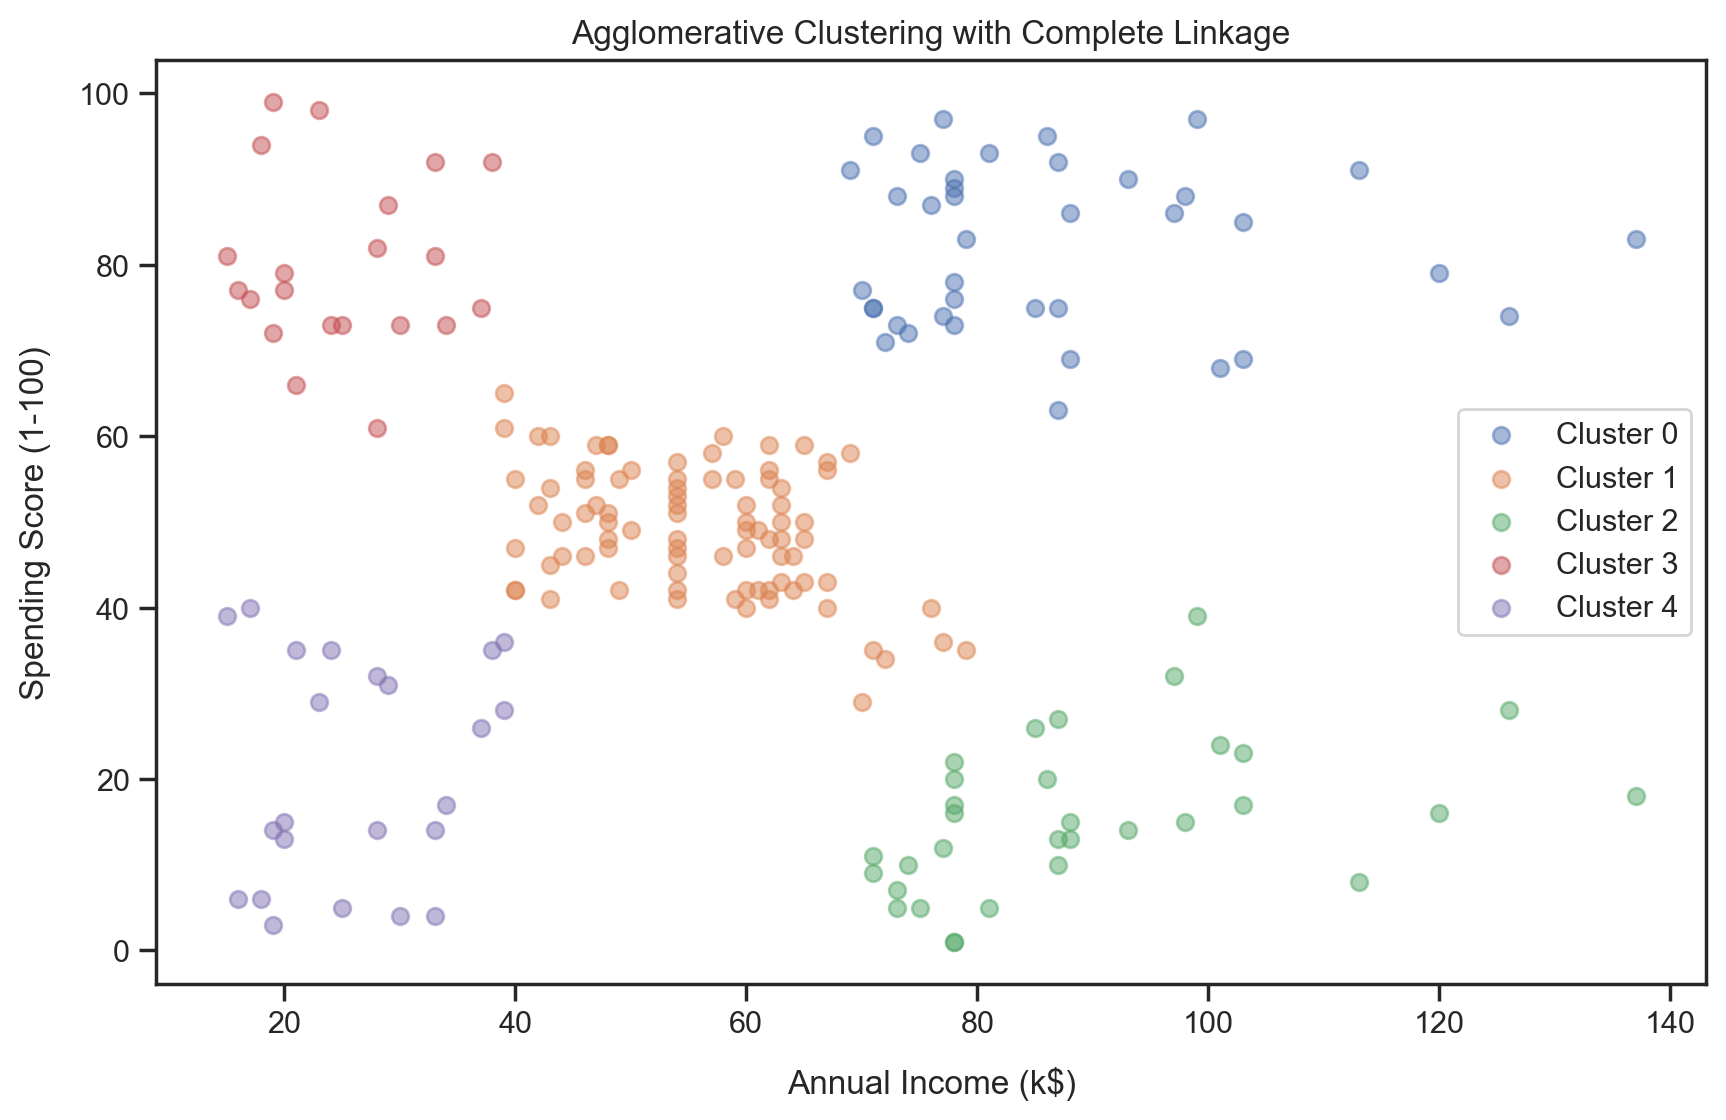

In [18]:
# Plot the predicted clusters
plt.figure(figsize=(10,6))

# Plot the predicted clusters with complete linkage
if hasattr(agglomerative_complete, 'labels_'):
    plt.figure(figsize=(10, 6))
    for cluster in range(k):
        cluster_data = mc_df[mc_df['Cluster_Complete'] == cluster]
        plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                    label=f'Cluster {cluster}', alpha=0.5)

    plt.title('Agglomerative Clustering with Complete Linkage')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()
else:
    print("Error: Cannot plot clusters. Agglomerative Clustering with Complete Linkage fit was not successful.")


In [19]:
# compute and print the silhouette score
# Compute the silhouette score with complete linkage
if hasattr(agglomerative_complete, 'labels_'):
    silhouette_avg_complete = silhouette_score(X, agglomerative_complete.labels_)
    # Print the silhouette score
    print(f"\nSilhouette Score for Agglomerative Clustering with Complete Linkage (K={k}): {silhouette_avg_complete}")
else:
    print("Error: Cannot compute silhouette score. Agglomerative Clustering with Complete Linkage fit was not successful.")



Silhouette Score for Agglomerative Clustering with Complete Linkage (K=5): 0.5529945955148897
